In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models 


import matplotlib.pyplot as plt
import numpy as np



In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 13s 0us/step


(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
y_test = y_test.reshape(-1,)

In [8]:

classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [9]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

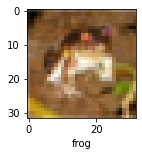

In [10]:
plot_sample(X_train, y_train, 0)

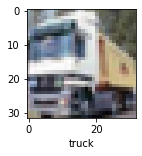

In [11]:
plot_sample(X_train, y_train, 1)

In [12]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [13]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [14]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 17s 4ms/step - loss: 1.4239 - accuracy: 0.4904
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0720 - accuracy: 0.6249
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9439 - accuracy: 0.6717
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8582 - accuracy: 0.7013
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7869 - accuracy: 0.7263
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7290 - accuracy: 0.7450
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6793 - accuracy: 0.7635
Epoch 8/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6317 - accuracy: 0.7781
Epoch 9/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.5875 - accuracy: 0.7946
Epoch 10/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.55

In [16]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9294 - accuracy: 0.7012


[0.9294400215148926, 0.701200008392334]

In [17]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 1s 2ms/step


array([[5.2337273e-05, 2.4686027e-03, 1.0320062e-03, 8.3055699e-01,
        1.2101086e-03, 1.4136212e-01, 1.5467927e-03, 4.1708496e-05,
        2.1527708e-02, 2.0178905e-04],
       [3.3943907e-05, 7.8893915e-02, 1.2952564e-06, 2.5016377e-07,
        1.5958133e-07, 5.2707311e-08, 2.4609443e-09, 1.2357212e-07,
        9.2101377e-01, 5.6575042e-05],
       [7.5370505e-02, 4.1896740e-01, 3.4582594e-03, 1.2418138e-02,
        2.3911282e-02, 7.1439883e-03, 3.3178428e-04, 7.3404717e-03,
        4.2136371e-01, 2.9694466e-02],
       [7.7660209e-01, 5.6785729e-02, 1.3932392e-01, 1.1190339e-03,
        1.9176565e-03, 5.4465472e-06, 1.0649985e-04, 1.1389935e-05,
        2.4092989e-02, 3.5283949e-05],
       [5.8167711e-07, 1.2916158e-05, 8.3348705e-03, 3.7567951e-02,
        3.9424740e-02, 1.3699314e-03, 9.1283613e-01, 2.5810893e-06,
        4.3638604e-04, 1.3871348e-05]], dtype=float32)

In [18]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

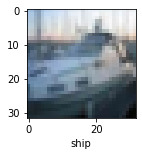

In [19]:
plot_sample(X_test, y_test,2)

In [20]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [21]:
classes[y_classes[2]]


'ship'

In [22]:
from sklearn.metrics import confusion_matrix , classification_report
print("Classification Report: \n", classification_report(y_test,y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.81      0.67      0.73      1000
           1       0.84      0.81      0.82      1000
           2       0.64      0.52      0.57      1000
           3       0.47      0.55      0.51      1000
           4       0.65      0.66      0.65      1000
           5       0.53      0.70      0.60      1000
           6       0.82      0.72      0.77      1000
           7       0.80      0.74      0.77      1000
           8       0.78      0.85      0.82      1000
           9       0.81      0.79      0.79      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000

